In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [3]:
plt.style.use('ggplot')

In [4]:
outbound = pd.read_csv('../data/clean/LAX_Origin_Flight_Delays_2016.csv')
inbound = pd.read_csv('../data/clean/LAX_Dest_Flight_Delays_2016.csv')

#flight_list = [outbound_file, inbound_file]
#all_flights = pd.concat(flight_list)

In [43]:
total_outbound_flights = outbound.groupby(['Month']).count()
total_outbound_flights = pd.DataFrame(total_outbound_flights['TailNum'])
total_outbound_flights = total_outbound_flights.rename(columns={'TailNum':'Outbound Flights'})

total_inbound_flights = inbound.groupby(['Month']).count()
total_inbound_flights = pd.DataFrame(total_inbound_flights['TailNum'])
total_inbound_flights = total_inbound_flights.rename(columns={'TailNum':'Inbound Flights'})

total_flights = pd.concat([total_outbound_flights, total_inbound_flights], axis=1, join_axes=[total_outbound_flights.index])
total_flights['Total Flights'] = total_flights.sum(axis=1)
total_flights = total_flights[['Total Flights']]


,Total Flights
Month,
1,32231
2,30510
3,34295
4,33714
5,35113
6,37797
7,39364
8,38989
9,34899


In [6]:
#Outbound Flight Delays
outbound_delays = outbound.loc[outbound['DepDel15'] == 1]
total_outbound_delays = len(outbound_delays['FlightNum'])
print(f"Total outbound delays: {total_outbound_delays}")

monthly_outbound = outbound_delays.groupby(['Month']).sum()
m_outbound_sum = pd.DataFrame(monthly_outbound['DepDel15'])

#Inbound Flight Delays
inbound_delays = inbound.loc[inbound['ArrDel15'] == 1]
total_inbound_delays = len(inbound_delays['FlightNum'])
print(f"Total inbound delays: {total_inbound_delays}")

monthly_inbound = inbound_delays.groupby(['Month']).sum()
m_inbound_sum = pd.DataFrame(monthly_inbound['ArrDel15'])


Total outbound delays: 48494
Total inbound delays: 49065


In [34]:
merged = m_outbound_sum.join(m_inbound_sum)
merged['AllDelays'] = merged.sum(axis=1)
total_delays = pd.DataFrame(merged['AllDelays'])
total_delays

,AllDelays
Month,
1,6390.0
2,4595.0
3,7353.0
4,6030.0
5,6987.0
6,11143.0
7,10654.0
8,10355.0
9,6592.0


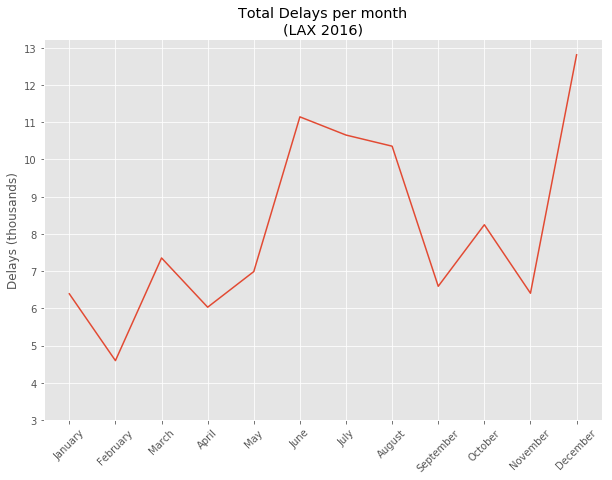

In [10]:
x_axis = np.arange(0,12,1)
y_axis = np.arange(3,14,1)
months = calendar.month_name[1:13]

plt.figure(figsize=(10,7))
plt.plot(x_axis, total_delays['AllDelays'])
plt.xticks(x_axis, months, rotation=45)
plt.yticks(np.arange(3000, 14000, 1000), y_axis)
plt.ylabel('Delays (thousands)')
plt.title('Total Delays per month\n(LAX 2016)')
plt.show()